## Credit Card Users Clustering Analysis 

### Introduction

We need to develop a customer segmentation to define marketing strategy. The dataset summarizes the usage behavior of about 9000 active credit card holders during a period of 6 months. The file is at a customer level with 17 behavioral variables.

In order to do this segmentation we will use cluster analysis. We will also compare the results obtained from 2 popular methods of clustering: Hierarchical agglomerative and K means clustering.

K-means clustering is a type of unsupervised learning, which is used with unlabeled dataset. The goal of this algorithm is to find K groups in the data. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity.

Hierarchical clustering  is a method of cluster analysis which seeks to build a hierarchy of clusters. Strategies for hierarchical clustering generally fall into two types: Agglomerative and divisive.
Agglomerative is a "bottom-up" approach where each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.

### Importing Packages and Dataset

In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb

In [2]:
os.chdir(r"D:\DS\Machine learning\Clustering assignment")
cc=pd.read_csv('creditcard.csv')

### Basic Data Exploration

In [3]:
cc.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


##### Data dictionary

CUST_ID : Identification of Credit Card holder (Categorical).

BALANCE : Balance amount left in their account to make purchases.

BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated).

PURCHASES : Amount of purchases made from account.

ONEOFF_PURCHASES : Maximum purchase amount done in one-go.

INSTALLMENTS_PURCHASES : Amount of purchase done in installment.

CASH_ADVANCE : Cash advance taken by the user.

PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased).

ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased).

PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done).

CASHADVANCEFREQUENCY : How frequently the cash borrowed with card.

CASHADVANCETRX : Number of Transactions made with "Cash in Advanced".

PURCHASES_TRX : Numbe of purchase transactions made.

CREDIT_LIMIT : Limit of Credit Card for user.

PAYMENTS : Amount of Payment done by user.

MINIMUM_PAYMENTS : Minimum amount of payments due.

PRCFULLPAYMENT : Percent of full payment paid by user.

TENURE : Tenure of credit card service for user.


In [4]:
cc.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [5]:
#Checking null values
cc.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

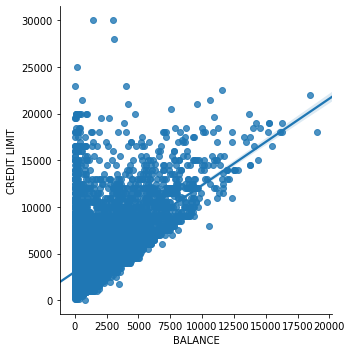

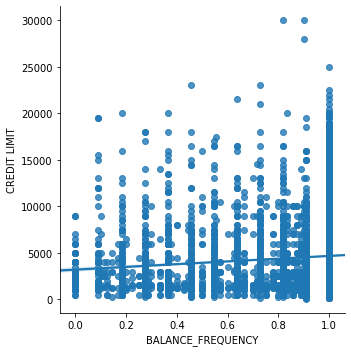

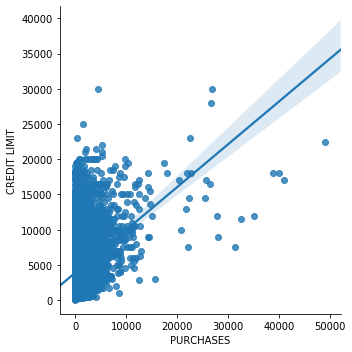

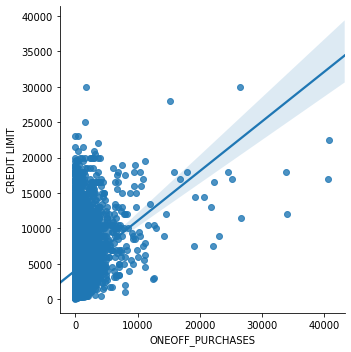

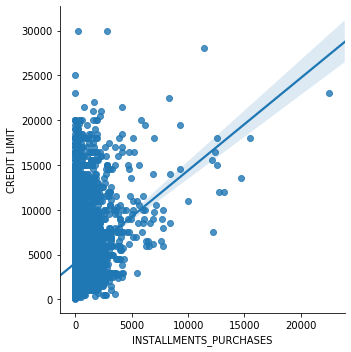

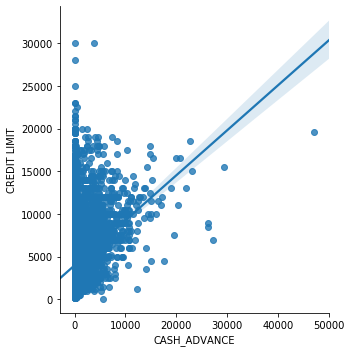

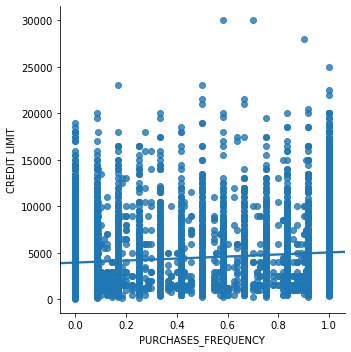

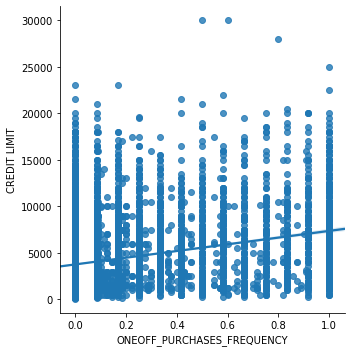

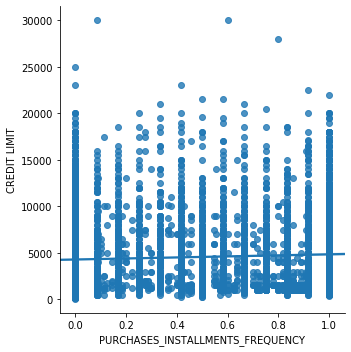

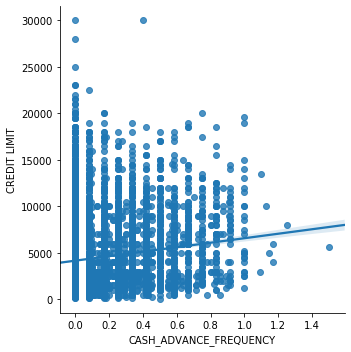

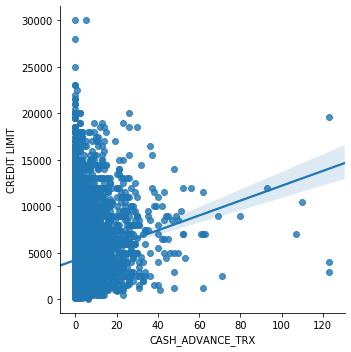

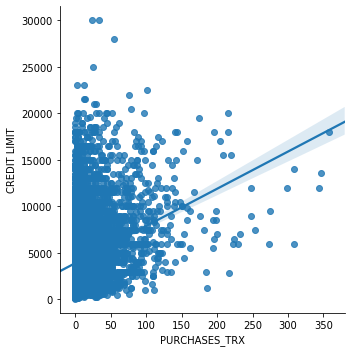

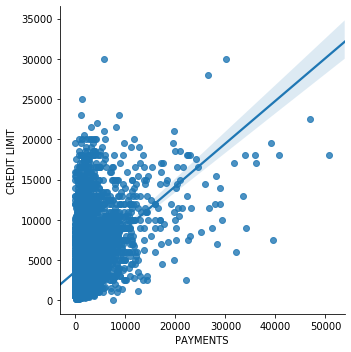

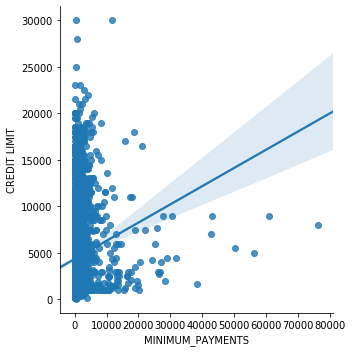

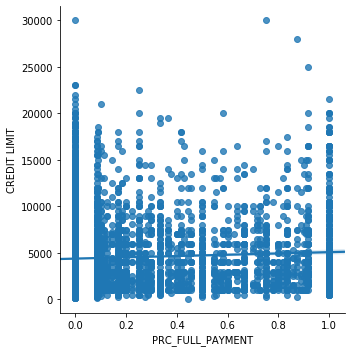

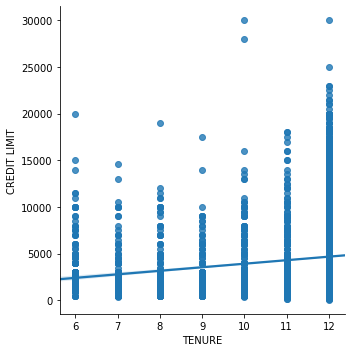

In [6]:
# Checking relation of CREDIT_LIMIT with other columns
cc1=cc.drop(columns=['CUST_ID'])
for i in cc1.columns:
    if i!='CREDIT_LIMIT':
        sb.lmplot(i,'CREDIT_LIMIT',data=cc)
        plt.xlabel(i)
        plt.ylabel('CREDIT LIMIT')
        plt.show()

In [7]:
# Credit limit seems to be associated with balance. We will impute the missing value with mean of credit_limit
# values in between range 18 and 19 (Since the missing value row has balance value of 18.4)
cc1['CREDIT_LIMIT'].fillna(cc1.loc[((cc1['BALANCE']>18)&(cc1['BALANCE']<19)),:].CREDIT_LIMIT.mean(),inplace=True)

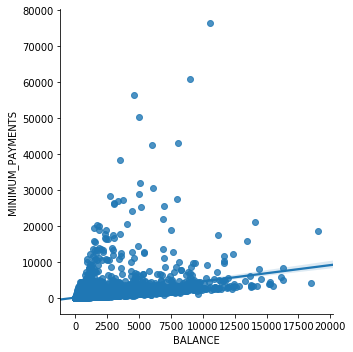

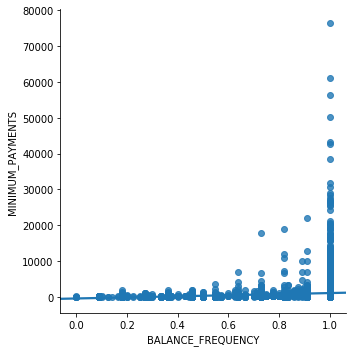

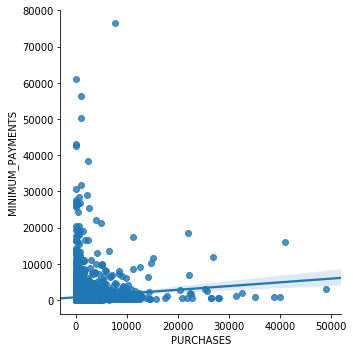

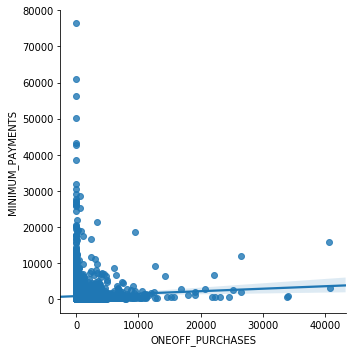

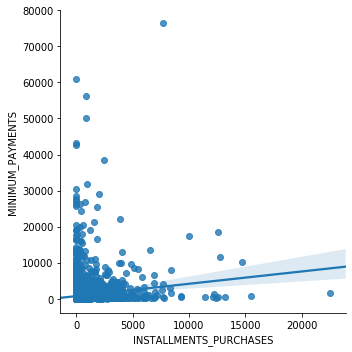

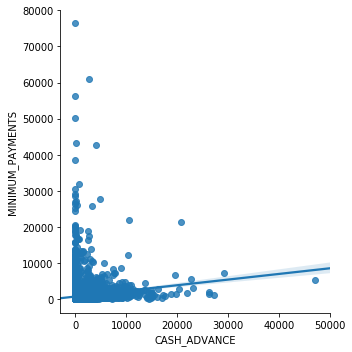

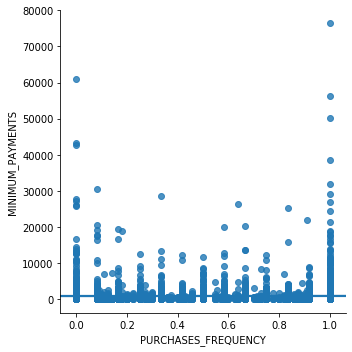

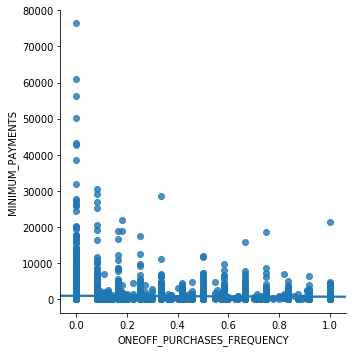

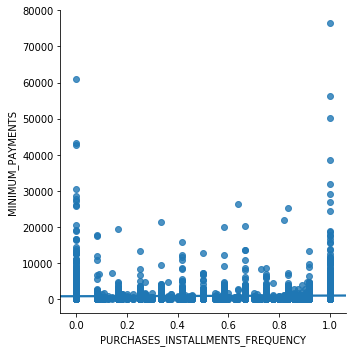

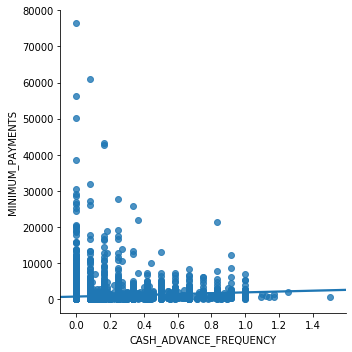

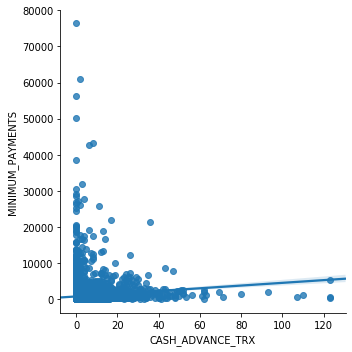

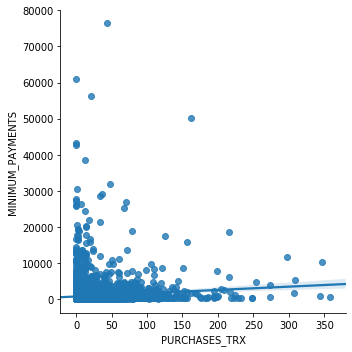

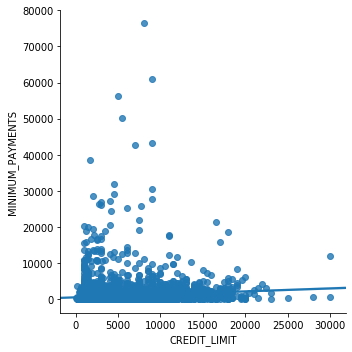

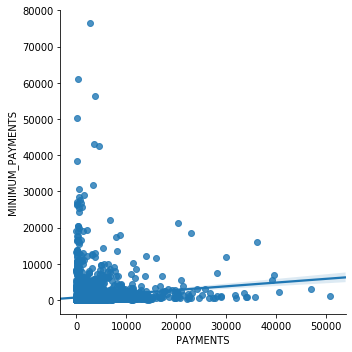

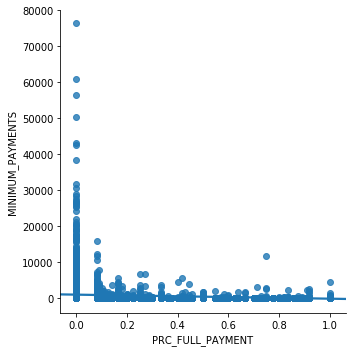

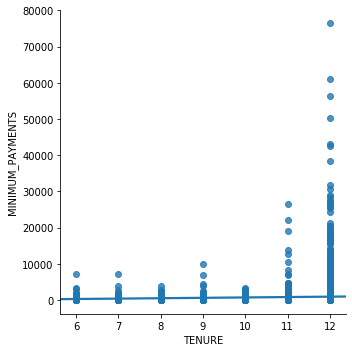

In [8]:
for i in cc1.columns:
    if i!='MINIMUM_PAYMENTS':
        sb.lmplot(i,'MINIMUM_PAYMENTS',data=cc)
        plt.xlabel(i)
        plt.ylabel('MINIMUM_PAYMENTS')
        plt.show()

Text(0.5, 1.0, 'Distribution of MINIMUM_PAYMENTS')

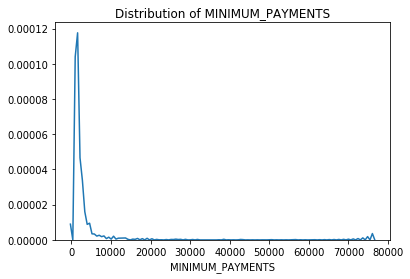

In [9]:
# Minimum_payments doesnt have any significant association with other variables. So we will impute it based on 
# its distribution.
cc2=cc1.dropna()
sb.distplot(cc2['MINIMUM_PAYMENTS'],hist=False)
plt.title("Distribution of MINIMUM_PAYMENTS")

In [10]:
#Imputing with median due to skewed distribution
cc1['MINIMUM_PAYMENTS'].fillna(cc1['MINIMUM_PAYMENTS'].median(),inplace=True)

In [11]:
# Missing value check after imputation
cc1.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [12]:
# Standardizing columns
cc_scaled=(cc1-np.mean(cc1,axis=0))/np.std(cc1,axis=0)
cc_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960389,-0.528979,-0.302400,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688673,0.818642,0.097500,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826094,-0.383805,-0.093293,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826094,-0.598688,-0.228307,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905420,-0.364368,-0.257266,-0.525551,0.36068


### KMeans Clustering

In [13]:
from sklearn.cluster import KMeans

Text(0, 0.5, 'SSE')

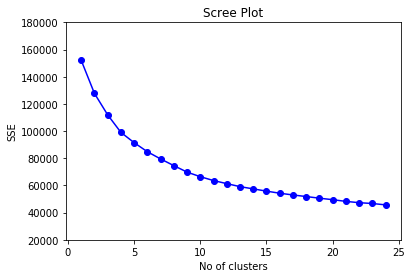

In [14]:
#Checking scree plot to select number of clusters
inertias = []
xval=[]
for i in range (1,25):
    km = KMeans(n_clusters=i,n_init=40)
    inertia = km.fit(cc_scaled).inertia_
    inertias.append(inertia)
    xval.append(i)
plt.ylim(20000,180000)
plt.plot(xval,inertias,'bo-')
plt.title('Scree Plot')
plt.xlabel('No of clusters')
plt.ylabel('SSE')

In [15]:
# Running k means with 4 clusters
km = KMeans(n_clusters=4,n_init=40)
km.fit(cc_scaled)
labels=km.labels_
clusters=pd.concat([cc1, pd.DataFrame({'cluster':labels})], axis=1)

In [16]:
#Mean of the clusters
clusters.groupby(['cluster']).mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,
0,894.768927,0.934715,1236.263333,593.995933,642.541696,209.816318,0.885255,0.297109,0.711930,0.042487,0.789067,22.092692,4214.013741,1331.325429,639.740452,0.269313,11.594474
1,4602.449658,0.968389,501.862982,320.188797,181.759123,4521.509581,0.287832,0.138911,0.185671,0.484792,14.294904,7.665831,7546.160857,3484.054216,2003.674460,0.034888,11.386800
2,3551.153761,0.986879,7681.620098,5095.878826,2587.208264,653.638891,0.946418,0.739031,0.788060,0.071290,2.085575,89.359413,9696.943765,7288.739497,1972.767288,0.286707,11.951100
3,1012.745945,0.789977,270.213240,210.016021,60.464108,597.051145,0.170249,0.086322,0.080642,0.114901,2.125943,2.907240,3278.257543,975.085151,553.868540,0.077983,11.446707


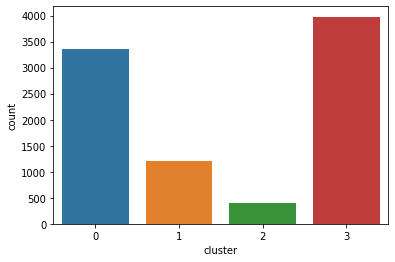

In [17]:
# Size of different clusters
sb.countplot('cluster',data=clusters)

Cluster 0- Low balance, moderate usage mostly through purchase in installment mode, rarely uses for cash advance, frequent purchases indication low amount usage per transaction. Large group. **Moderately heavy user using  card for purchases using installments**. 

Cluster 1- High balance and update frequency, low purchases but very frequently takes cash in advance, high credit limit, medium payment,high payment due, low percent of full payment. Small group. Basically purchases less but uses card for cash. **Heavy user of credit card for cash advances.**

Cluster 2- High balance left and update frequency. Used primarily for purchasing a bit and for cash. High purchase frequency. Very high credit limit. High payments and % of payment. More one off than in installments. Smallest group. **Heavy user of credit card for purchases**.

Cluster 3-Low balance, low balance update frequency, low purchases and moderate cash advance user, low min payment due and percent of full payment, having least credit limit. Equal number of cash advance and purchase transactions indicate usage of card for low value purchases (Since purchases amount is much lesser than cash advance). Most common type of user. **Least active credit car user**.

### Hierarchical Clustering

In [18]:
#Importing specific packages
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage

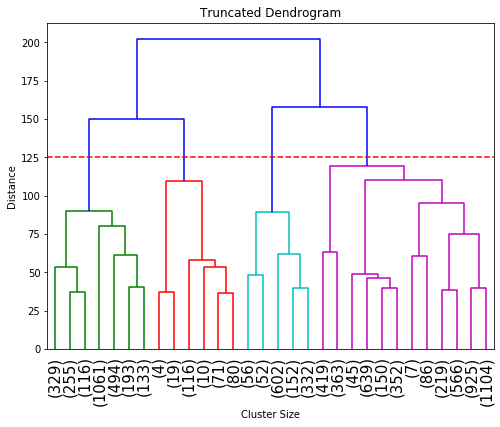

In [19]:
# Ward linkage for noisy data and minimizing inter cluster variance. Complete linkage was giving imbalanced clusters.
Z = linkage(cc_scaled, 'ward')
plt.figure(figsize=(8,6))
dendrogram(Z,truncate_mode='lastp',p=30,leaf_rotation=90, leaf_font_size=15.)
plt.axhline(y=125, color='r', linestyle='--')
plt.title("Truncated Dendrogram")
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

In [20]:
#Importing packages for agglomerative clustering
import sklearn
from sklearn.cluster import AgglomerativeClustering
hclust = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
hclust.fit(cc_scaled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=4,
                        pooling_func='deprecated')

In [22]:
cc1['Group'] = hclust.labels_
cc1.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Group
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [23]:
cc1.groupby(['Group']).mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Group,,,,,,,,,,,,,,,,,
0,968.716643,0.798613,416.372644,289.912101,126.767083,590.140516,0.311319,0.140145,0.173450,0.101443,1.859487,5.630769,3338.431540,1033.976019,745.567399,0.101139,11.182359
1,4036.749057,0.983515,8549.539100,5785.096967,2766.442133,615.783755,0.926864,0.695843,0.718051,0.062167,1.616667,90.056667,10198.166667,7837.681412,2004.471707,0.279028,11.963333
2,4451.248211,0.978691,369.983643,236.857245,133.211549,3857.378713,0.208494,0.090875,0.133888,0.428438,12.500000,4.792295,7192.462312,3070.404899,1549.929988,0.030563,11.827471
3,1066.927932,0.966572,1527.409694,724.779675,802.820093,423.679244,0.908158,0.314425,0.790728,0.071601,1.783030,27.688493,4766.361699,1725.546886,571.606576,0.295425,11.954669


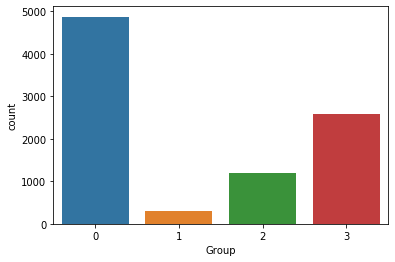

In [24]:
# Size of different clusters
sb.countplot('Group',data=cc1)

Cluster 0-**Least active credit car user**.

Cluster 1- **Heavy user of credit card for purchases**.

Cluster 2- **Heavy user of credit card for cash advances.**

Cluster 3- **Moderately heavy user using  card for purchases using installments**. 

We can observe that while the numbers are changing the groups are basically very similar to the groups from K Means.